<br>Point：
<br>做三维图像:可以尝试用三维散点图(scatter)绘制(不同的u设置不同的大小)

<br>QUS：
<br>对于齐次边界条件,本征值只能选取特殊的分离值,这对于分离离散化后的方程来说意味着需要选择合适的参数使得矩阵的行列式为0;
这样就需要先用sympy模块算出特定的参数,再构造Lamda矩阵,然后求解有无穷多组解的齐次线性方程组;
这样与非齐次边界条件兼容可能较为困难;
这或许可以通过取较小的边界条件实现

<br>Todo：
<br>加上Umat在边界处的值
<br>给子图配colorbar
<br>给fig设置标题

In [3]:
import numpy as np
from math import cos,sin,pi,sqrt
xN,Nx=1,90
yN,Ny=1,90
zN,Nz=1,80
xlist=np.linspace(0,xN,Nx)
deltax=xlist[1]-xlist[0]
# k=sqrt(3)/deltax
m,n,p=1,1,1#谐振腔的模式
k=pi*m/xN
# k=0
def Boundary(y,z):
    '''边界条件函数
    其中f(y,z)是x=0处的边界条件
    g(y,z)是x=xN处的边界条件'''
    f=lambda y,z:cos(n*pi*y/yN)*sin(p*pi*z/zN)
    g=lambda y,z:(-1)**m*cos(pi*y/yN)*sin(pi*z/zN)
    return f(y,z),g(y,z)
#构造Lamda矩阵
Lambda=np.zeros((Nx-2,Nx-2))
alpha=(k*deltax)**2-2
for i in range(Nx-3):
    Lambda[i,i]=alpha
    Lambda[i+1,i],Lambda[i,i+1]=1,1
Lambda[Nx-3,Nx-3]=alpha
#填充U矩阵
ylist=np.linspace(0,yN,Ny)
zlist=np.linspace(0,zN,Nz)
Omega=np.zeros(Nx-2)
Umat=np.zeros((Nx-2,Ny,Nz))
for j in range(Ny):
    for k in range(Nz):
        Omega[0],Omega[Nx-3]=Boundary(ylist[j],zlist[k])
        Umat[:,j,k]=np.linalg.solve(Lambda,-Omega)

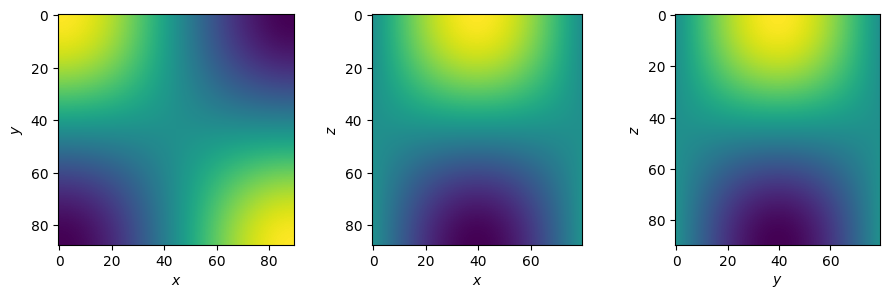

In [4]:
#作图
import matplotlib.pyplot as plt
index=10
fig=plt.figure(figsize=(11,3))
ax1=fig.add_subplot(1,3,1)
ax1.imshow(Umat[:,:,index])
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2=fig.add_subplot(1,3,2)
ax2.imshow(Umat[:,index,:])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$z$')
ax3=fig.add_subplot(1,3,3)
ax3.imshow(Umat[index,:,:])
ax3.set_xlabel('$y$')
ax3.set_ylabel('$z$')
plt.show()